## 共享单车租车量预测——线性回归分析

## 1、导入必要的工具包

In [1]:
import numpy as np  # 矩阵操作
import pandas as pd # SQL数据处理

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

from sklearn.metrics import mean_squared_error  #评价回归预测模型的性能
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt   #画图
import seaborn as sns

# 图形出现在Notebook里而不是新窗口
%matplotlib inline

## 2. 读取数据

In [2]:
# path to where the data lies
#dpath = './data/'
data = pd.read_csv("FE_bikeshare_cnt.csv")

#通过观察前5行，了解数据每列（特征）的概况
data.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  season_1  \
0   0        0           0  0.355170  0.373517  0.828620   0.284606         1   
1   0        0           0  0.379232  0.360541  0.715771   0.466215         1   
2   0        0           1  0.171000  0.144830  0.449638   0.465740         1   
3   0        0           1  0.175530  0.174649  0.607131   0.284297         1   
4   0        0           1  0.209120  0.197158  0.449313   0.339143         1   

   season_2  season_3  ...  weekday_1  weekday_2  weekday_3  weekday_4  \
0         0         0  ...          0          0          0          0   
1         0         0  ...          0          0          0          0   
2         0         0  ...          1          0          0          0   
3         0         0  ...          0          1          0          0   
4         0         0  ...          0          0          1          0   

   weekday_5  weekday_6  weathersit_1  weathersit_2  weathersit_3   cnt  
0          0          1             0             1             0   985  
1          0          0             0             1             0   801  
2          0          0             1             0             0  1349  
3          0          0             1             0             0  1562  
4          0          0             1             0             0  1600  

[5 rows x 34 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            731 non-null    int64  
 1   holiday       731 non-null    int64  
 2   workingday    731 non-null    int64  
 3   temp          731 non-null    float64
 4   atemp         731 non-null    float64
 5   hum           731 non-null    float64
 6   windspeed     731 non-null    float64
 7   season_1      731 non-null    int64  
 8   season_2      731 non-null    int64  
 9   season_3      731 non-null    int64  
 10  season_4      731 non-null    int64  
 11  mnth_1        731 non-null    int64  
 12  mnth_2        731 non-null    int64  
 13  mnth_3        731 non-null    int64  
 14  mnth_4        731 non-null    int64  
 15  mnth_5        731 non-null    int64  
 16  mnth_6        731 non-null    int64  
 17  mnth_7        731 non-null    int64  
 18  mnth_8        731 non-null    

### 数据准备

In [4]:
# 从原始数据中分离输入特征x和输出y
y = data["cnt"]

X = data.drop(["cnt"], axis = 1)



In [5]:
#将数据分割训练数据与测试数据
from sklearn.model_selection import train_test_split

# 随机采样20%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, train_size=0.8)

feat_names = X_train.columns
print("train samples:", X_train.shape)

train samples: (584, 33)


## 3、确定模型类型

### 3.1 尝试缺省参数的线性回归

In [6]:
# 线性回归
#class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)


# 1.使用默认配置初始化学习器实例
lr = LinearRegression()

# 2.用训练数据训练模型参数
lr.fit(X_train, y_train)

# 3. 用训练好的模型对测试集进行预测
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)


# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
#fs = pd.DataFrame({"columns":list(feat_names), "coef":list((lr.coef_.T))})
#fs.sort_values(by=['coef'],ascending=True)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print ('RMSE on Training set:',rmse_train)
print ('RMSE on Test set:',rmse_test)

r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)
print("r2_score on Training set:", r2_score_train)
print("r2_score on Test set:", r2_score_test)

RMSE on Training set: 745.2803818716415
RMSE on Test set: 815.7663314227875
r2_score on Training set: 0.8506372887570783
r2_score on Test set: 0.8274013801511464


### 3.2 正则化的线性回归（L2正则 --> 岭回归）
    

In [8]:
#岭回归／L2正则
#class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
n_alphas = 20
alphas = np.logspace(-3,3,n_alphas)

ridge = RidgeCV(alphas=alphas, normalize=True, store_cv_values=True)  
ridge.fit(X_train, y_train)   
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print ('RMSE on Training set:',rmse_train)
print ('RMSE on Test set:',rmse_test)

r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

print("r2_score on Training set:", r2_score_train)
print("r2_score on Test set:", r2_score_test)

print("best alpha",ridge.alpha_)

#交叉炎症估计的测试误差
mse_cv = np.mean(ridge.cv_values_, axis = 0)
rmse_cv = np.sqrt(mse_cv)
print("cv of rmse:", rmse_cv)

RMSE on Training set: 747.3372229276231
RMSE on Test set: 807.6425059242898
r2_score on Training set: 0.8498117221810033
r2_score on Test set: 0.8308219168674108
best alpha 0.0379269019073225
cv of rmse: [ 793.65231811  792.35339288  790.9124027   789.52627143  788.35025751
  787.92811362  790.51406907  803.32835032  844.45963706  942.19004594
 1108.36951377 1315.65215088 1519.53860174 1684.25189611 1795.65105167
 1861.17556915 1896.37007819 1914.32223085 1923.234169   1927.59820953]


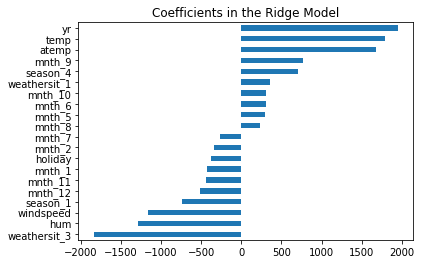

In [18]:
coefs = pd.Series(ridge.coef_, index = feat_names)

#正系数值的10个特征和负系数值最小的10个特征
imp_coefs = pd.concat([coefs.sort_values().head(10), coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

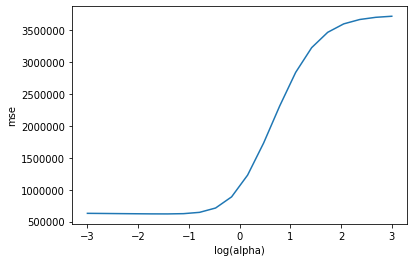

In [19]:
mse_mean = np.mean(ridge.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1))

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

### 3.3 正则化的线性回归（L1正则 --> Lasso）

In [22]:
lasso = LassoCV()

lasso.fit(X_train, y_train) 

best_alpha = lasso.alpha_
print("Best alpha:", best_alpha)

#模型性能:cv
mse_cv = np.mean(lasso.mse_path_, axis = 1)
rmse_cv = np.sqrt(mse_cv)
print("cv of rmse:", rmse_cv)

y_test_pred = lasso.predict(X_test)
y_train_pred = lasso.predict(X_train)

print ('RMSE on Training set:',rmse_train)
print ('RMSE on Test set:',rmse_test)

r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

print("r2_score on Training set:", r2_score_train)
print("r2_score on Test set:", r2_score_test)

#print("best alpha",ridge.alpha_)

Best alpha: 1.654931923606331
cv of rmse: [1922.88560696 1894.49592994 1853.47777945 1799.46433796 1731.50200447
 1670.16136652 1614.93314158 1565.33034798 1520.88839689 1481.165445
 1445.7428914  1414.22590387 1384.88652649 1354.07514059 1323.13426089
 1295.12640552 1268.07715997 1243.57805165 1215.46318985 1185.06144503
 1154.78402704 1127.70253156 1103.89138281 1082.95576832 1064.42247134
 1048.04725939 1033.81163929 1021.42568099 1010.54862418 1001.01143583
  992.64813073  985.11878307  978.17783852  969.53953255  960.2959542
  952.17856677  945.35931648  936.8013066   927.3107822   919.07334137
  912.09441828  906.01346839  900.76186724  895.49517373  889.20980939
  883.55187662  878.51879755  873.71407338  868.68787585  863.67558572
  858.99388226  854.84939475  851.21093743  848.11567309  845.16175075
  842.48566886  839.59047165  836.96948194  834.21969849  831.85906465
  829.82639137  828.08596246  826.56627911  825.25121488  823.88117776
  822.67995447  821.65008817  820.7820

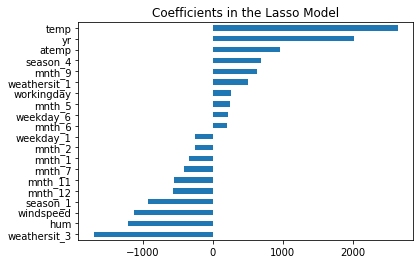

In [23]:
coefs = pd.Series(lasso.coef_, index = feat_names)

#正系数值的10个特征和负系数值最小的10个特征
imp_coefs = pd.concat([coefs.sort_values().head(10), coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [24]:
coefs

yr              2018.615073
holiday         -162.722290
workingday       259.122833
temp            2647.724064
atemp            960.856102
hum            -1206.672740
windspeed      -1121.728208
season_1        -922.666826
season_2           0.000000
season_3        -133.609166
season_4         695.747911
mnth_1          -331.701028
mnth_2          -253.657653
mnth_3           154.800958
mnth_4            -0.553087
mnth_5           242.803405
mnth_6           198.020895
mnth_7          -414.650999
mnth_8            57.412145
mnth_9           632.482635
mnth_10          150.964647
mnth_11         -546.183028
mnth_12         -568.538670
weekday_0       -180.969585
weekday_1       -245.806921
weekday_2        -74.376965
weekday_3          0.000000
weekday_4          0.000000
weekday_5         16.289188
weekday_6        219.130102
weathersit_1     510.004101
weathersit_2      -0.000000
weathersit_3   -1699.504895
dtype: float64